In [23]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
#import data
data = pd.read_csv("/content/Musical_Instruments.doc",error_bad_lines=False, sep=';')
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 21: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 2\nSkipping line 58: expected 1 fields, saw 2\nSkipping line 76: expected 1 fields, saw 2\nSkipping line 78: expected 1 fields, saw 3\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 101: expected 1 fields, saw 6\nSkipping line 107: expected 1 fields, saw 2\nSkipping line 109: expected 1 fields, saw 2\nSkipping line 120: expected 1 fields, saw 3\nSkipping line 126: expected 1 fields, saw 2\nSkipping line 141: expected 1 fields, saw 4\nSkipping line 147: expected 1 fields, saw 2\nSkipping line 161: expected 1 fields, saw 2\nSkipping line 170: expected 1 fields, saw 3\nSkipping line 180: expected 1 fields, saw 2\nSki

,X
0,"{""."": ""A2IBPI20UZIR0U"", ""asin"": ""1384719342"", ..."
1,"{"" "": ""A14VAT5EAX3D9S"", ""asin"": ""1384719342"", ..."
2,"{""."": ""A195EZSQDW3E21"", ""asin"": ""1384719342"", ..."
3,"{""."": ""A2C00NNG1ZQQG2"", ""asin"": ""1384719342"", ..."
4,"{""."": ""A94QU4C90B1AX"", ""asin"": ""1384719342"", ""..."
...,...
9306,"{""."": ""A2VRAT69JDAD3W"", ""asin"": ""B00JBIVXGC"", ..."
9307,"{""."": ""A306NASGVUDFKF"", ""asin"": ""B00JBIVXGC"", ..."
9308,"{""."": ""A1TSKKBNV38E8Y"", ""asin"": ""B00JBIVXGC"", ..."
9309,"{""."": ""A14B2YH83ZXMPP"", ""asin"": ""B00JBIVXGC"", ..."


In [25]:
data = [X.strip() for X in data.X] # remove both the leading and the trailing characters
data = [X for X in data if X] # removes empty strings, because they are considered in Python as False
data[0:20]

['{".": "A2IBPI20UZIR0U", "asin": "1384719342", ".": "cassandra tu \\"Yeah, well, that\'s just like, u...", "helpful": [0, 0], ".": "Not much to write about here, but it does exactly what it\'s supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".": "02 28, 2014"}',
 '{" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work j

In [26]:
import spacy
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm") 

one_block = data[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [27]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])


[]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
#Counting tokens
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,asin,1
1,shows,1
2,cord,1
3,price,1
4,summary,1


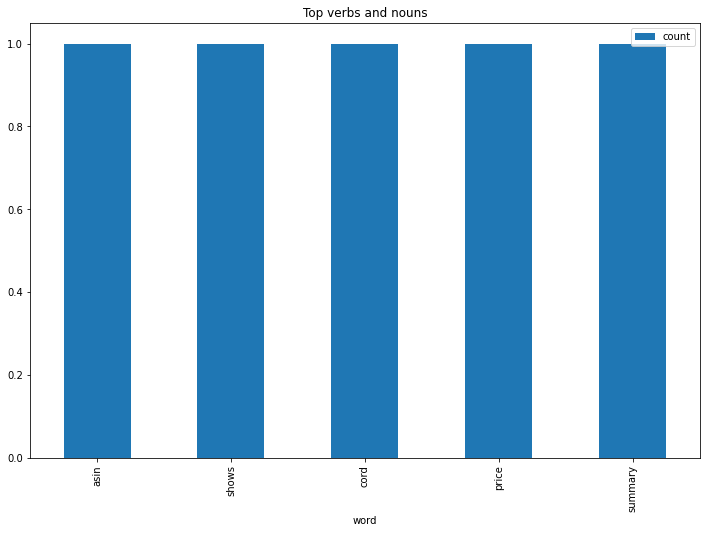

In [29]:
## Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

## Emotion mining

In [30]:
#Sentiment analysis
afinn = pd.read_csv('/content/Afinn.csv' , sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [31]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [32]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [33]:
import numpy as np 
import pandas as pd 
import string 
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[5:15]

['now my recordings are much more crisp.',
 'it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".',
 '": "02 28, 2014"} {" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".',
 '": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording.',
 ':DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product!',
 ':]", "overall": 5.0, "summary": "Jake", "..": 1363392000, ".',
 '": "03 16, 2013"} {".',
 '": "A195EZSQDW

In [42]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"{""."
1,""": ""A2IBPI20UZIR0U"", ""asin"": ""1384719342"", ""."
2,""": ""cassandra tu \""Yeah, well, that's just lik..."
3,""": ""Not much to write about here, but it does ..."
4,filters out the pop sounds.
...,...
83759,If you need a longer lasting string for whatev...
83760,"After a dozen or so gigs with them, they still..."
83761,""", ""overall"": 4.0, ""summary"": ""Good for coated."
83762,""", "".."": 1405987200, ""."


In [43]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [44]:
# test that it works
calculate_sentiment(text = 'very sad')

-2

In [45]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [46]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     1
1     5
2    13
3    15
4     5
5     7
6    32
7    15
8    74
9    30
Name: word_count, dtype: int64

In [47]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
2736,""": ""this is a beautiful guitar...the finish is...",22,79
70396,""": ""There really is nothing not to like about ...",23,100
48104,have been playing finger style only - usually ...,24,216
55009,"its very easy to use and program, I did not ha...",24,137
43642,Nice clean boost and a good overdrive sound wh...,26,172
42133,""": ""what a nice clear sound it has,,and smooth...",27,140
11385,""": ""Great great great great great great great ...",27,10
57979,"Solid, nice sound, very good quality to make a...",27,89
61926,""": ""These days on my pedal board I have severa...",30,244
46884,""": ""nice good like fine great fantastic like l...",40,30


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    83764.000000
mean         1.097978
std          2.021986
min        -12.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         40.000000
Name: sentiment_value, dtype: float64

In [49]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,"{"".",0,1
1,""": ""A2IBPI20UZIR0U"", ""asin"": ""1384719342"", "".",0,5
3,""": ""Not much to write about here, but it does ...",0,15
4,filters out the pop sounds.,0,5
5,now my recordings are much more crisp.,0,7


In [50]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


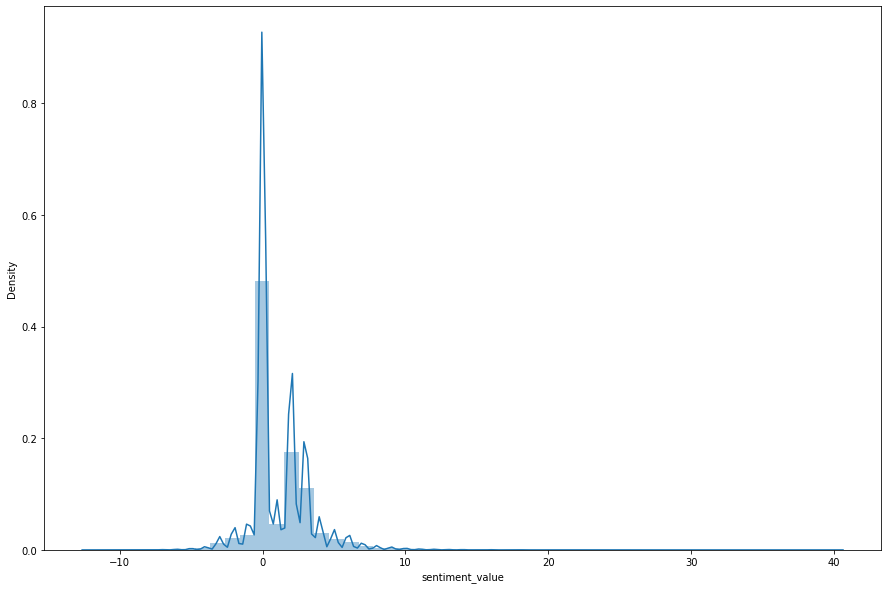

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.distplot(sent_df['sentiment_value']);

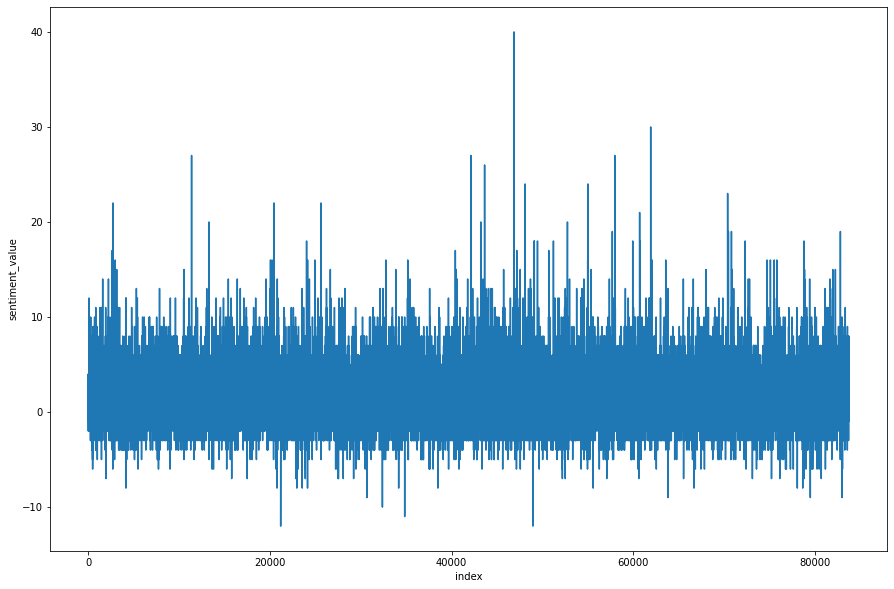

In [52]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

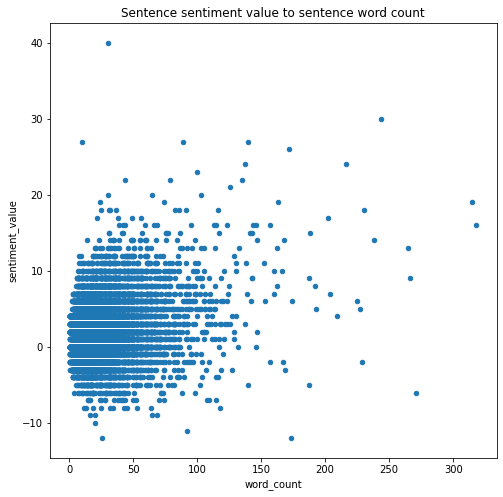

In [53]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');